In [1]:
#Importing all the required modules for Predicting the Wine Quality 

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborninstance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
 
dataset = pd.read_csv("Wine+Quality+Dataset.csv")
 
print(dataset.shape)

(1599, 12)


In [3]:
#Checking if there is any missing value in the Dataset

dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

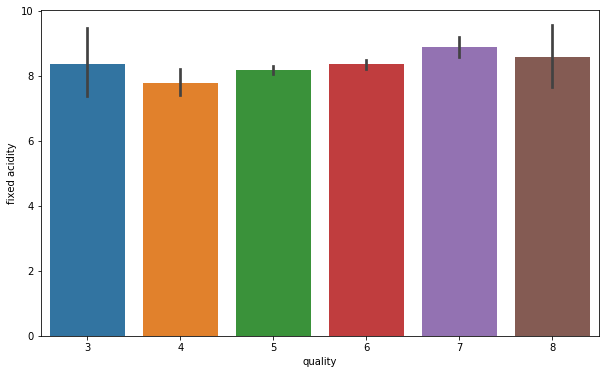

In [4]:
#Here we see that fixed acidity does not give any specification to classify the quality.

fig = plt.figure(figsize = (10,6))
seaborninstance.barplot(x = 'quality', y = 'fixed acidity', data = dataset)

plt.show()

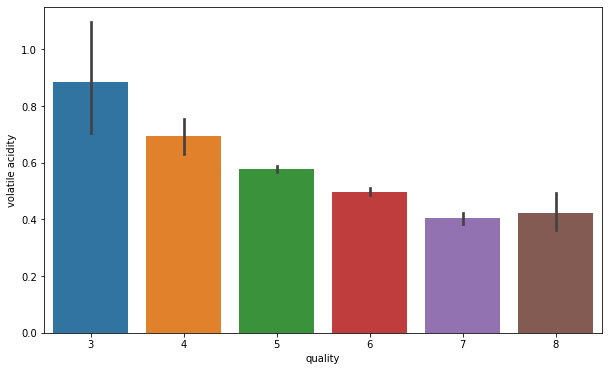

In [5]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

fig = plt.figure(figsize = (10,6))
seaborninstance.barplot(x = 'quality', y = 'volatile acidity', data = dataset)

plt.show()

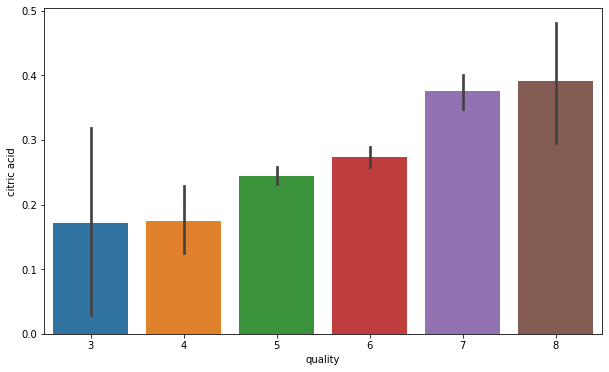

In [6]:
#Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
seaborninstance.barplot(x = 'quality', y = 'citric acid', data = dataset)

plt.show()

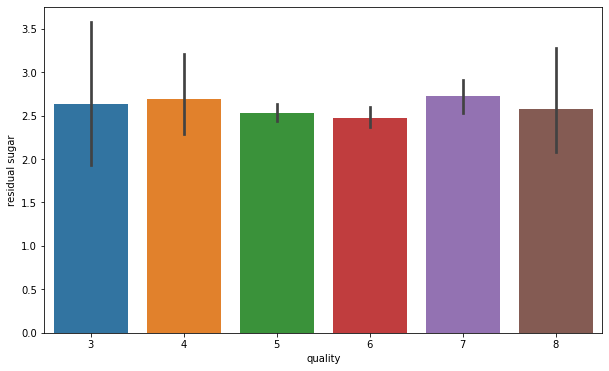

In [7]:
fig = plt.figure(figsize = (10,6))
seaborninstance.barplot(x = 'quality', y = 'residual sugar', data = dataset)

plt.show()

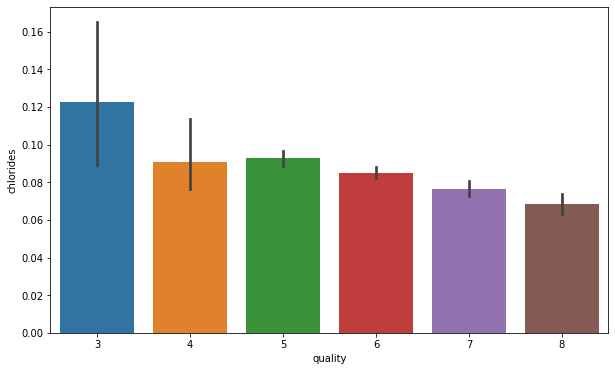

In [8]:
#Composition of chloride also go down as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
seaborninstance.barplot(x = 'quality', y = 'chlorides', data = dataset)

plt.show()

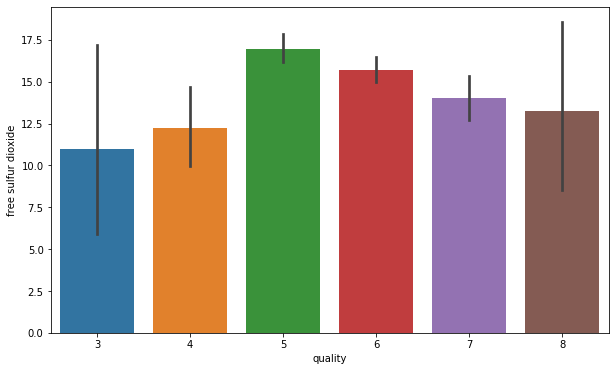

In [9]:
fig = plt.figure(figsize = (10,6))
seaborninstance.barplot(x = 'quality', y = 'free sulfur dioxide', data = dataset)

plt.show()

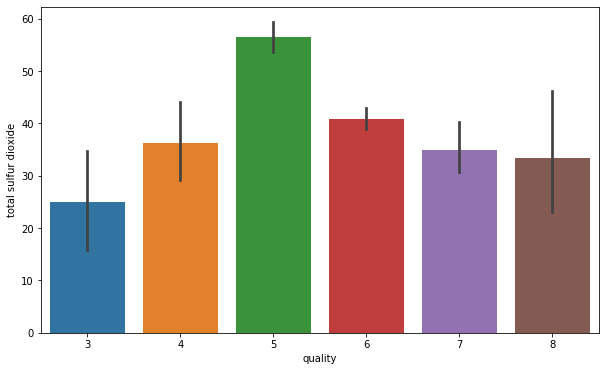

In [10]:
fig = plt.figure(figsize = (10,6))
seaborninstance.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataset)

plt.show()

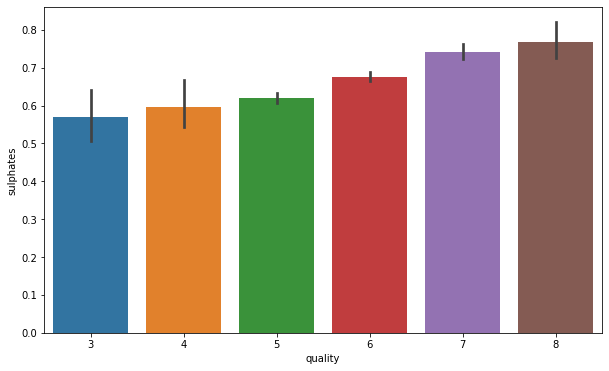

In [11]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
seaborninstance.barplot(x = 'quality', y = 'sulphates', data = dataset)

plt.show()

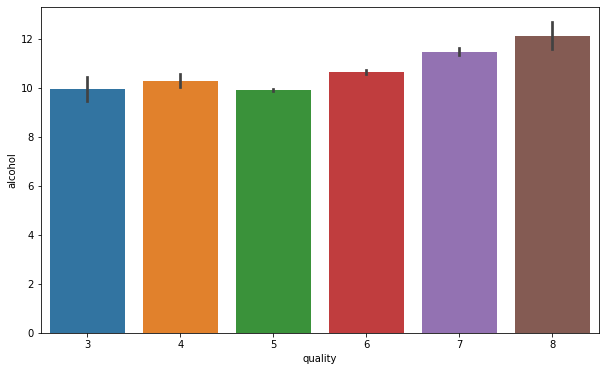

In [12]:
#Alcohol level also goes higher as te quality of wine increases

fig = plt.figure(figsize = (10,6))
seaborninstance.barplot(x = 'quality', y = 'alcohol', data = dataset)

plt.show()

In [13]:
#Making a new column by dividing the quality of wine into three types(good, better, best)

dataset['qua']=""
for i,j in enumerate(dataset.iloc[:,-2]):
    if j<=4: dataset['qua'][i]='good'
    elif j<7: dataset['qua'][i]='better'
    else : dataset['qua'][i]='best'

C:\Users\aryan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aryan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\aryan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


better    1319
best       217
good        63
Name: qua, dtype: int64


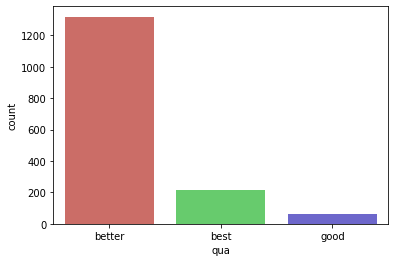

In [14]:
print(dataset['qua'].value_counts())

seaborninstance.countplot(x = 'qua', data = dataset, palette = 'hls')
plt.show()

In [15]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
#Selecting the required number of columns

X = np.asarray(dataset.iloc[:,:-2])
Y = dataset['qua'].values.reshape(-1,1)

In [17]:
#Splitting the dataset into 2 parts(Training and Testing)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [18]:
#Using Random Forest Classifier to predict the data

forest = RandomForestClassifier(n_estimators=200)
forest.fit(X_train, Y_train)

Y_predf = forest.predict(X_test)

print("Training Accuracy :", forest.score(X_train, Y_train))
print("Validation Accuracy :", forest.score(X_test, Y_test))
cm = confusion_matrix(Y_test, Y_predf)
print(cm)

C:\Users\aryan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Accuracy : 1.0
Validation Accuracy : 0.878125
[[ 15  17   0]
 [  8 266   0]
 [  0  14   0]]


In [19]:
#Using SVC to predict the data

model = SVC()
model.fit(X_train, Y_train)

Y_predm = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))
cm = confusion_matrix(Y_test, Y_predm)
print(cm)

Training Accuracy : 0.8178264268960125
Validation Accuracy : 0.859375
[[  1  31   0]
 [  0 274   0]
 [  0  14   0]]


C:\Users\aryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
#Using Logistic Regression to predict the data

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_predl = logreg.predict(X_test)

print("Training Accuracy :", logreg.score(X_train, Y_train))
print("Validation Accuracy :", logreg.score(X_test, Y_test))
cm = confusion_matrix(Y_test, Y_predl)
print(cm)

Training Accuracy : 0.8311180609851446
Validation Accuracy : 0.834375
[[  6  26   0]
 [ 11 261   2]
 [  0  14   0]]


C:\Users\aryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
#We get the best result by using Random Forest Classifier

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_predf)
print("Accuracy of Random Forest Classifier => ", accuracy)

Accuracy of Random Forest Classifier =>  0.878125
